### 데이터 전처리
* 데이터 가공 단계

### 표준 점수
* 훈련 세트의 스케일을 바꿈
* how?
  * 특성?의 평균을 빼고 표준 편차로 나눔

### 브로드캐스팅
* 넘파이가 배열에서 사칙 연산 시 크기를 자동으로 확장시켜 수행하는 것 (행과 열 Oo)

<br>

-----

<br>

### **train_test_split()**
* 훈련 데이터와 테스트 데이터로 나누는 함수
* `test_size()` : 기본값 25%
* `shuffle()` : 무작위로 섞을지 말지 여부 결정
* `kneighbors()` : 이웃 객체 메서드 (입력한 데이터와 가장 가까운 이웃을 찾아서 거리, 이웃 샘플의 인덱스 반환)
* `return_distance` : false(이웃 샘플의 인덱스만 반환, 거리 반환 Xx)

### **column_stack()**
* 전달 받은 리스트를 일렬로 세운 다음 다시 차례대로 연결

```
np.column_stack(([1,2,3], [4,5,6]))
```
➡ 결과: array([[1,4],[2,5],[3,6]])

* hstack : 열 방향으로 합침
* vstack : 행 방향으로 합침


## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np

In [4]:
# 결국 입력 데이터를 2차원으로 변경해 주는 파트라 생각하면 됨
fish_data = np.column_stack((fish_length, fish_weight))

In [7]:
fish_data[:10]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ],
       [ 29.7, 450. ],
       [ 29.7, 500. ],
       [ 30. , 390. ],
       [ 30. , 450. ],
       [ 30.7, 500. ]])

In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

➡ `train_test_split` 함수 자체가
1. 훈련 입력
2. 테스트 입력
3. 훈련 정답
4. 테스트 정답  
입력은 입력끼리, 정답(타겟)은 정답끼리 위 순서로 결과를 돌려줌

* random_state는 랜덤으로 값을 섞어주는 것

* 입력 (훈련, 테스트) 크기 확인

In [11]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


* 정답 (훈련, 테스트) 크기 확인

In [12]:
print(train_target.shape, test_target.shape)

(36,) (13,)


* 테스트 정답 데이터

In [13]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


`stratify=fish_target` : fish_target 비율에 맞춰라


In [14]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

* 테스트 정답 데이터 값이 바뀜 (큰 차이는 Xx... 비율을 맞추려 했다~ 정도)

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


* 학습

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

* 예측 (문제 발생)
  * 1(도미)이 나와야 하는 값인데 0(빙어)이 나옴
== 어디에도 소속되지 않는 애매한 값

In [22]:
# 길이 25 무게 150
print(kn.predict([[25, 150]]))

[0.]


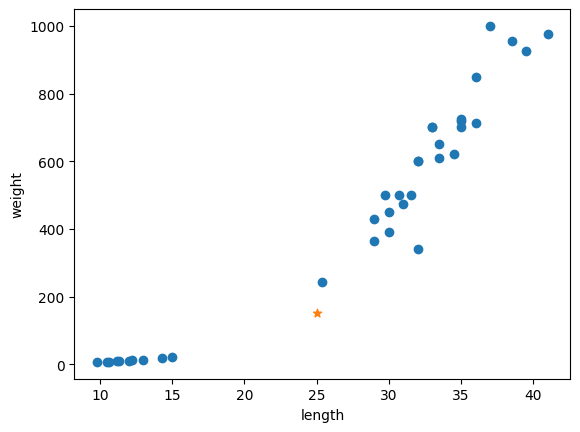

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

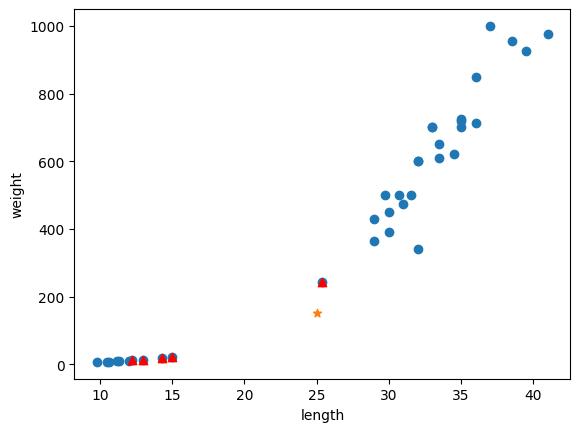

In [27]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='*') # 예측 실패 값
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='^', c='r') # 거리 계산
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [29]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [30]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


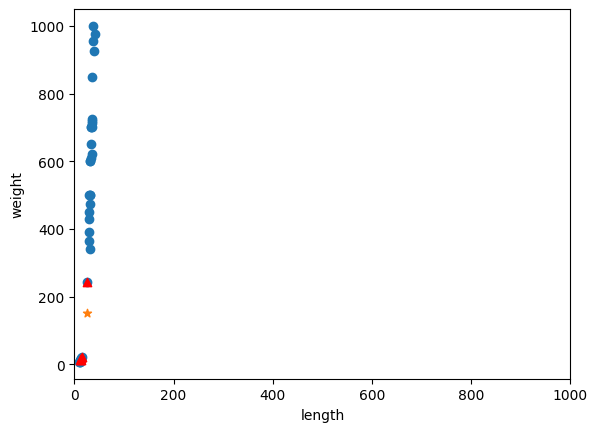

In [32]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='*') # 예측 실패 값
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='^', c='r') # 거리 계산
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 표준 점수 바꾸기
* why?
  * 두 데이터 간 나는 큰 차이를 줄이기 위해 값의 기준을 변경하는 것

In [33]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input)

In [34]:
print(mean, std)

[ 27.29722222 454.09722222] 312.8106242744172


In [35]:
train_scaled = (train_input - mean) / std
# (특성-평균)/표준편차

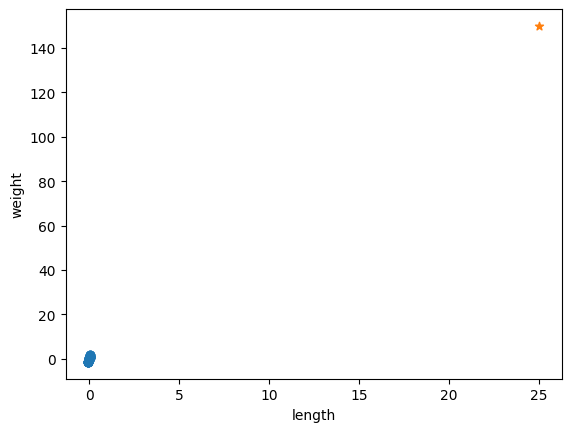

In [36]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='*') # 예측 실패 값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 전처리 모델 훈련
* 예측 실패한 값으로 훈련

In [39]:
new = ([25, 150] - mean) / std

In [40]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [44]:
test_scaled = (test_input - mean) / std

In [45]:
kn.score(test_scaled, test_target)

1.0

➡ 0이 아닌 1로 결과가 나옴

In [46]:
print(kn.predict([new]))

[0.]


In [47]:
distance, indexes = kn.kneighbors([new])

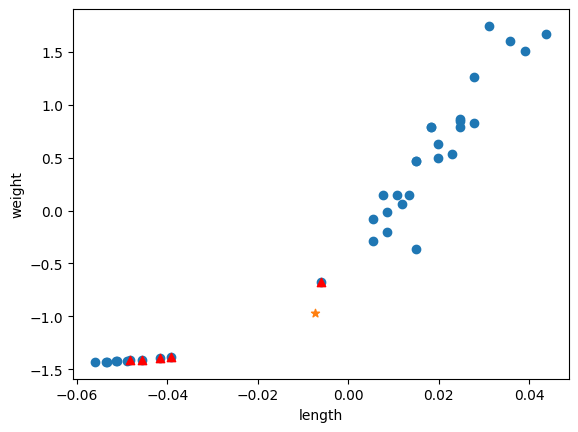

In [49]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='*') # 예측 실패 값
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='^', c='r') # 거리 계산
plt.xlabel('length')
plt.ylabel('weight')
plt.show()